**Ejercicios:**

**Ejercicio 1:**

a) Explique a que corresponden cada una de las componente del objeto resultante de utilizar la función prcomp.


* __sdev (Desviaciones estándar):__ Este componente contiene las desviaciones estándar de las componentes principales. Cada valor representa cuánta varianza está explicada por esa componente principal

* __rotation (Carga de variables):__  Esta matriz contiene las cargas de las variables originales en cada componente principal. Cada columna representa una componente principal, y cada fila representa una variable original. 

* __center (Centro de las variables):__ Esta componente contiene las medias de las variables originales. Antes de realizar el análisis de componentes principales, se resta este centro de las variables

* __scale (Escala de las variables):__ Esta componente contiene las escalas de las variables originales. Antes de realizar el análisis de componentes principales, las variables se dividen por estas escalas. 

b) Explique como se relacionan variables y observaciones en el gráfico biplot. Compare los resultados obtenidos utilizando la función predefinida en R prcomp con aquellos de los cálculos previos.


En un gráfico biplot, tanto las variables como las observaciones se representan en el mismo espacio bidimensional definido por las dos primeras componentes principales:

* Dirección de las flechas: Las variables se representan como flechas en el gráfico. La dirección de la flecha indica la dirección del aumento más rápido de la variable. La longitud de la flecha representa la varianza de esa variable en el espacio de las componentes principales.

* Posición de las observaciones: Las observaciones se representan como puntos en el gráfico. La posición de un punto en relación con las flechas de las variables indica cómo esa observación se relaciona con las variables originales.


**Ejercicio 2:**

En el ejemplo de los dígitos:

a) Ensaye diferentes observaciones del número 3 y diferentes número de componentes j. Interprete sus resultados

b) Agregue código para determinar el número óptimo de componentes en este caso

In [9]:
mnist <- read.csv("mnist_train.csv",header=FALSE)
#agregando nombres a las columnas
colnames(mnist)[1]<-"Digit"
for(i in seq(2,ncol(mnist),by=1)){colnames(mnist)[i]<-paste("pixel",as.character(i-1),sep = "")}

#selección de datos que representan el Nro 3
datos3 <- mnist[mnist$Digit==3,-1]
print(dim(datos3))

[1] 1431  784


In [10]:
##separando las columnas con sólo 0`s
datos <- matrix(0,nrow=1431,ncol=784)
col0 <- 0
k=0
for (j in 1:784){
   vec <- as.numeric(datos3[,j])
    if(sum(vec)==0)
        col0 <-c(col0,j)
    else{
        k <- k+1
        datos[,k] <- vec  
    }
}
datos <- datos[,1:k]
col0 <- col0[-1]
print(dim(datos))
print(length(col0))

[1] 1431  536
[1] 248


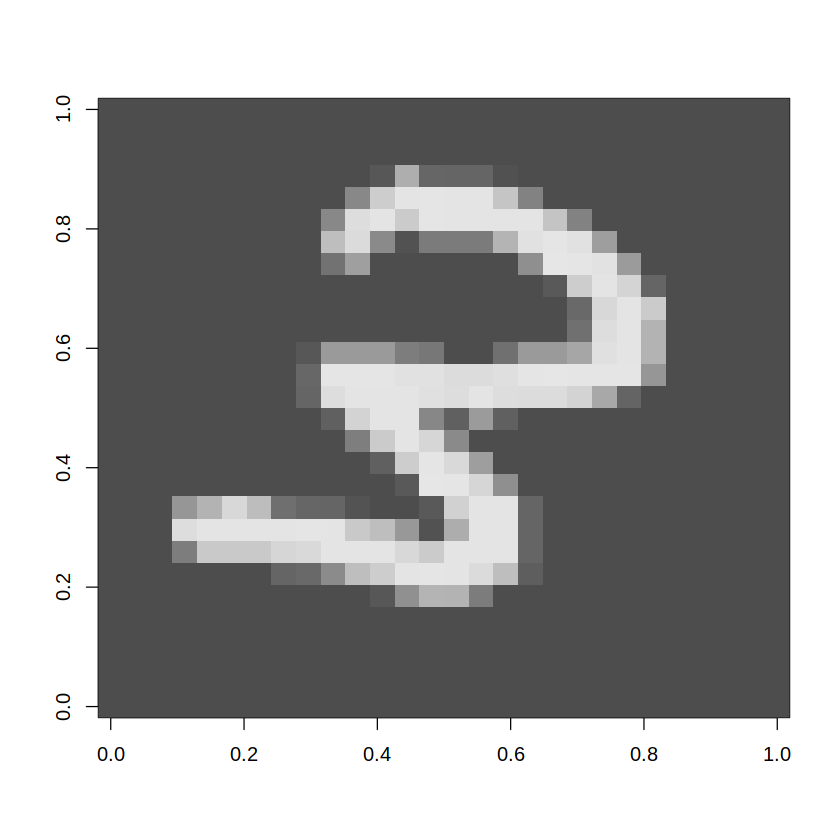

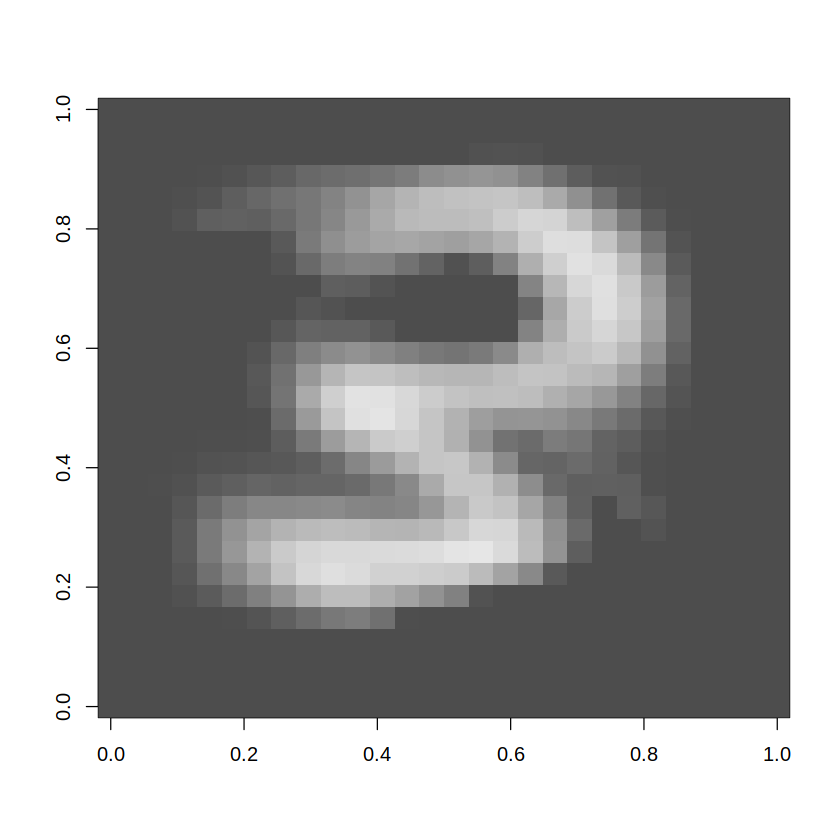

In [11]:
#reducción de dimensiones usando PCA
res <- prcomp(datos)
#utilizando j componentes
j=10
pr = matrix(res$rotation[,1:j],ncol=j,nrow=536)

#proyección en j componentes
pr_datos <- datos%*%pr

#reconstrucción a partir de la proyección en j componentes
rec <- trunc(pr_datos%*%t(pr))
rect <- rec

#truncando al rango de valores de grises
rect[rec[,]<0]<-0
rect[rec[,]>255]<-255

#agregando las columnas con ceros
datosR <- matrix(0,ncol=784,nrow=1431)
k<-1
l<-1
for (j in 1:784){
    if (j!=col0[k]){
       datosR[,j]<-rect[,l]
       l<-l+1
    }
    else
        k <- k+1
}
#comparación de la representación de una observación considerando las 784 variables o j
digit <- matrix(as.numeric(datos3[48,]), nrow = 28)
image(digit, col = grey.colors(255))

digitR <- matrix(as.numeric(datosR[48,]),nrow=28)
image(digitR, col = grey.colors(255))

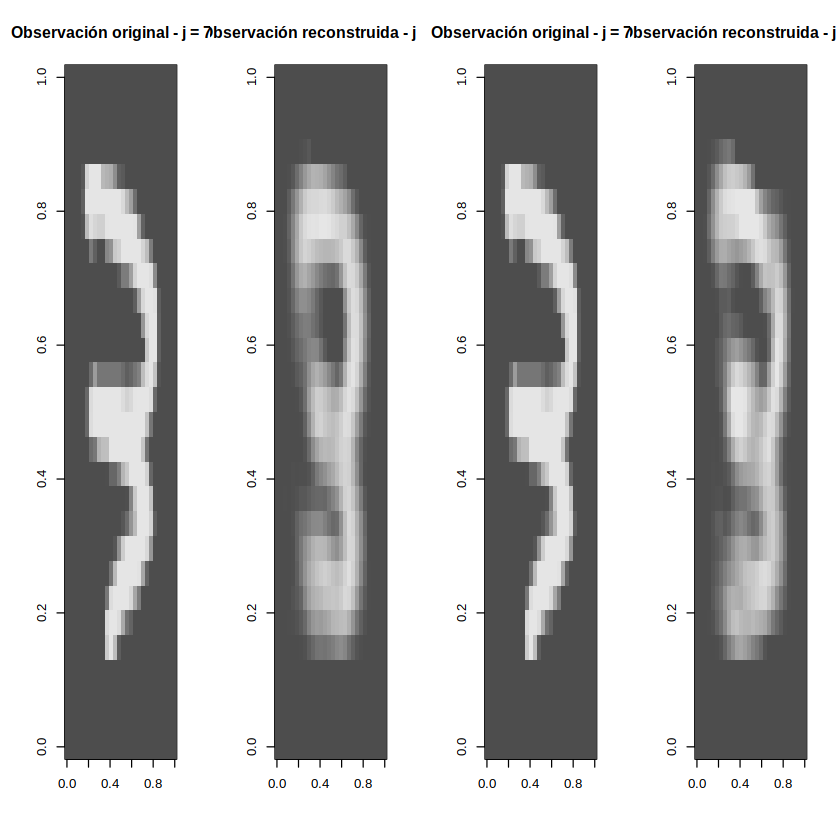

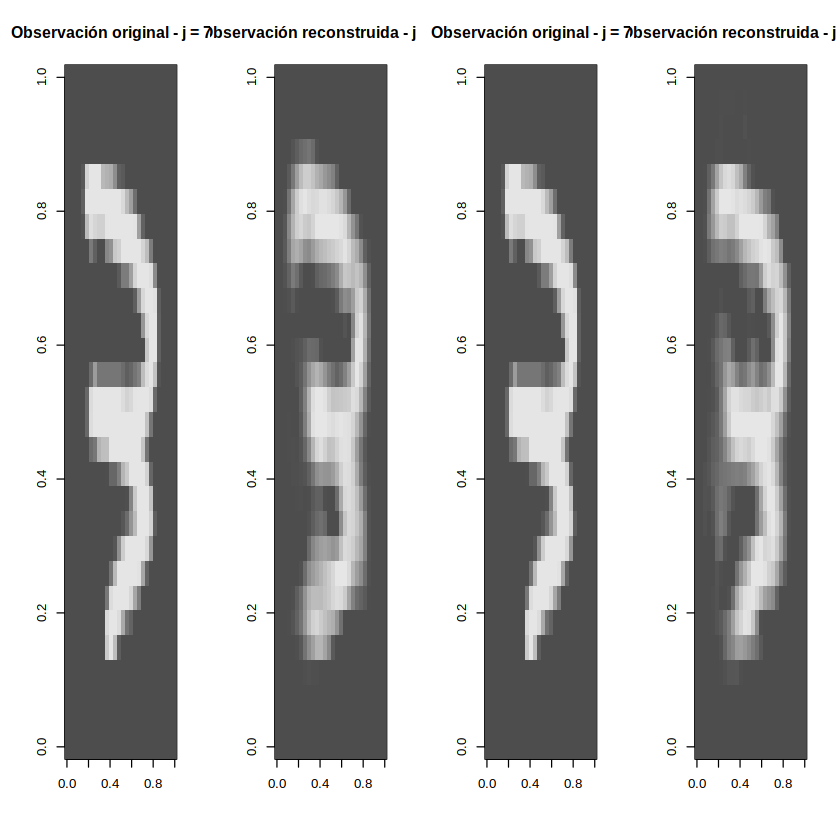

In [18]:
observacion <- 50  
j_values <- c(5, 10, 20, 50)  

par(mfrow=c(1,length(j_values)))  # Configura la disposición de los gráficos

for (i in seq_along(j_values)) {
  j <- j_values[i]
  
  # Reducción de dimensiones usando PCA
  res <- prcomp(datos)
  pr <- matrix(res$rotation[, 1:j], ncol = j, nrow = 536)
  
  # Proyección en j componentes
  pr_datos <- datos %*% pr
  
  # Reconstrucción a partir de la proyección en j componentes
  rec <- trunc(pr_datos %*% t(pr))
  
  # Truncando al rango de valores de grises
  rec[rec < 0] <- 0
  rec[rec > 255] <- 255
  
  # Agregando las columnas con ceros
  datosR <- matrix(0, ncol = 784, nrow = 1431)
  k <- 1
  l <- 1
  for (j in 1:784) {
    if (j != col0[k]) {
      datosR[, j] <- rec[, l]
      l <- l + 1
    } else
      k <- k + 1
  }
  
  # Mostrar la representación de la observación original y la reconstruida
  digit <- matrix(as.numeric(datos3[observacion, ]), nrow = 28)
  digitR <- matrix(as.numeric(datosR[observacion, ]), nrow = 28)
  
  # Graficar las imágenes
  image(digit, col = grey.colors(255), main = paste("Observación original - j =", j))
  image(digitR, col = grey.colors(255), main = paste("Observación reconstruida - j =", j))
}


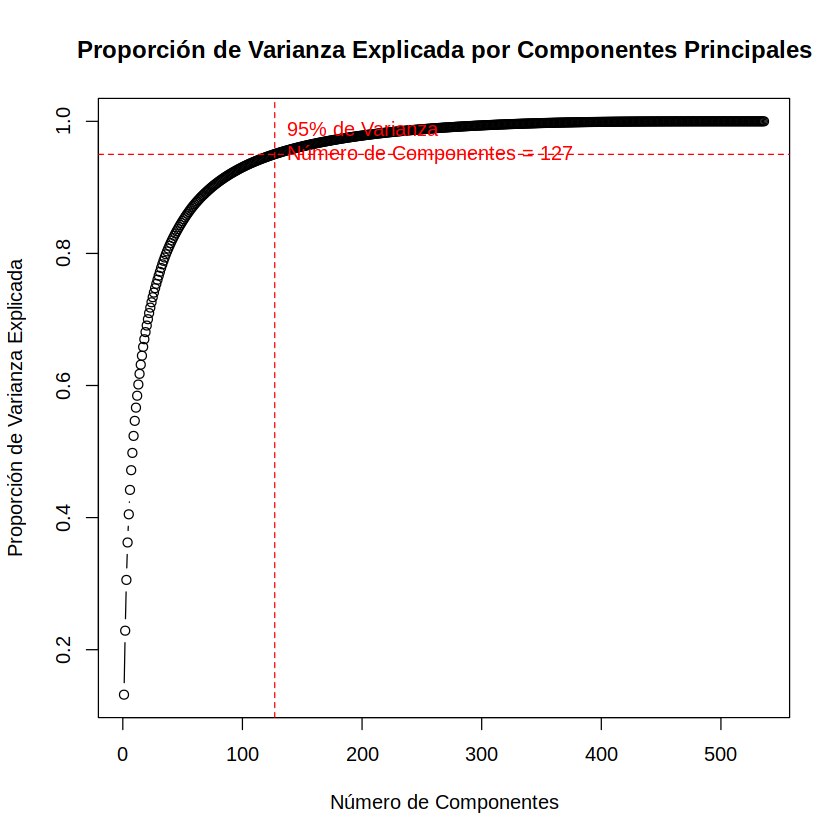

In [14]:
# Calcular la proporción de varianza explicada
prop_var <- cumsum(res$sdev^2) / sum(res$sdev^2)

# Graficar la proporción de varianza explicada
plot(prop_var, type = "b", xlab = "Número de Componentes", ylab = "Proporción de Varianza Explicada", main = "Proporción de Varianza Explicada por Componentes Principales")

# Encontrar el número de componentes que explica, por ejemplo, el 95% de la varianza
num_componentes_95 <- which(prop_var >= 0.95)[1]
abline(h = 0.95, col = "red", lty = 2)
abline(v = num_componentes_95, col = "red", lty = 2)
text(num_componentes_95, 0.96, paste("95% de Varianza\nNúmero de Componentes =", num_componentes_95), pos = 4, col = "red")


**Ejercicio 3:**

Revise la demostración del teorema 1 presentado para el Análisis de Componentes Principales Probabilista en Murphy "Machine Learning, a probabilistic approach", Capítulo 12 y explique las similitudes y diferencias con la formulación clásica basada en la maximimización de la proporción de varianza explicada (PEV).

**Similitudes:**

* Ambas técnicas buscan encontrar un conjunto de componentes principales que expliquen la mayor cantidad de varianza de los datos.
* Ambas técnicas utilizan un criterio de bondad de ajuste para evaluar la calidad de la estimación de las componentes principales.

**Diferencias:**

* El PPCA asume que los datos observados provienen de un modelo probabilístico subyacente.
* El PPCA utiliza una función de verosimilitud para evaluar la calidad de la estimación de las componentes principales.

**Ejercicio 4:**

Agregue código en el notebook para simular datos que utilicen el proceso generador de datos del PPCA. 
Con el conjunto de datos creados, realice estimaciones con el método predefinido en R para ppca y con el PCA estándar. Compare e interprete sus resultados.

In [9]:
# Configuración de parámetros
set.seed(123)
n <- 100  # Número de observaciones
p <- 3    # Número de variables originales
k <- 2    # Número de componentes principales

# Generación de datos con el proceso generador de datos del PPCA
# Simula datos de PCA y agrega ruido gaussiano
mu <- rep(0, p)   # Vector de medias
sigma <- matrix(0.2, nrow = p, ncol = p) + diag(0.8, nrow = p, ncol = p)  # Matriz de covarianza

# Añadimos columnas de ceros para completar la matriz a p columnas
z <- cbind(z, matrix(0, nrow = n, ncol = p - k))

# Datos observados
x <- z %*% t(sigma) + matrix(rnorm(n * p), nrow = n, ncol = p)


ERROR: Error in z %*% t(sigma): argumentos no compatibles
